<a href="https://colab.research.google.com/github/preetirawat2001/projects/blob/main/Copy_of_homeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymupdf
!pip install fuzzywuzzy[speedup]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.7 MB/s eta 0:00:00


In [ ]:
import fitz
import json
import re

def clean_line(line):
    junk_phrases = [
        "© Copyright 2000, Archibel S.A.",
        "Encyclopaedia Homeopathica"
    ]
    return not any(junk in line for junk in junk_phrases)


def pdf_to_cleaned_json(pdf_path, output_path, start_page=3, indices_to_remove=None):
    doc = fitz.open(pdf_path)
    remedies = []
    current_medicine = None
    current_section = None

    for page_num in range(start_page - 1, len(doc)):
        text = doc[page_num].get_text()
        lines = text.split('\n')

        for line in lines:
            line = line.strip()

            if not clean_line(line):
                continue


            if re.match(r'^[A-Z][a-z]+\s+[a-z]+$', line):
                if current_medicine:
                    remedies.append(current_medicine)

                current_medicine = {
                    "medicine": line,
                    "symptoms": {}
                }
                current_section = None


            elif re.match(r'^[A-Z][a-z]+$', line) and len(line.split()) == 1:
                current_section = line
                if current_medicine:
                    current_medicine["symptoms"][current_section] = []


            elif current_medicine and current_section:
                current_medicine["symptoms"][current_section].append(line)


    if current_medicine:
        remedies.append(current_medicine)

    remedies = [entry for entry in remedies if entry['medicine'].strip().lower() != "materia medica"]

    if indices_to_remove:
        remedies = [entry for i, entry in enumerate(remedies) if i not in indices_to_remove]


    with open(output_path, "w", encoding="utf-8") as f:
        json.dump(remedies, f, ensure_ascii=False, indent=2)

    print(f"Final cleaned JSON saved to {output_path}")


pdf_to_cleaned_json(
    pdf_path="/content/pathak.pdf",
    output_path="/content/phatak_final.json",
    start_page=3,
    indices_to_remove=[1, 2, 3, 4]
)


Final cleaned JSON saved to /content/phatak_final.json


In [ ]:
pip install wordcloud matplotlib


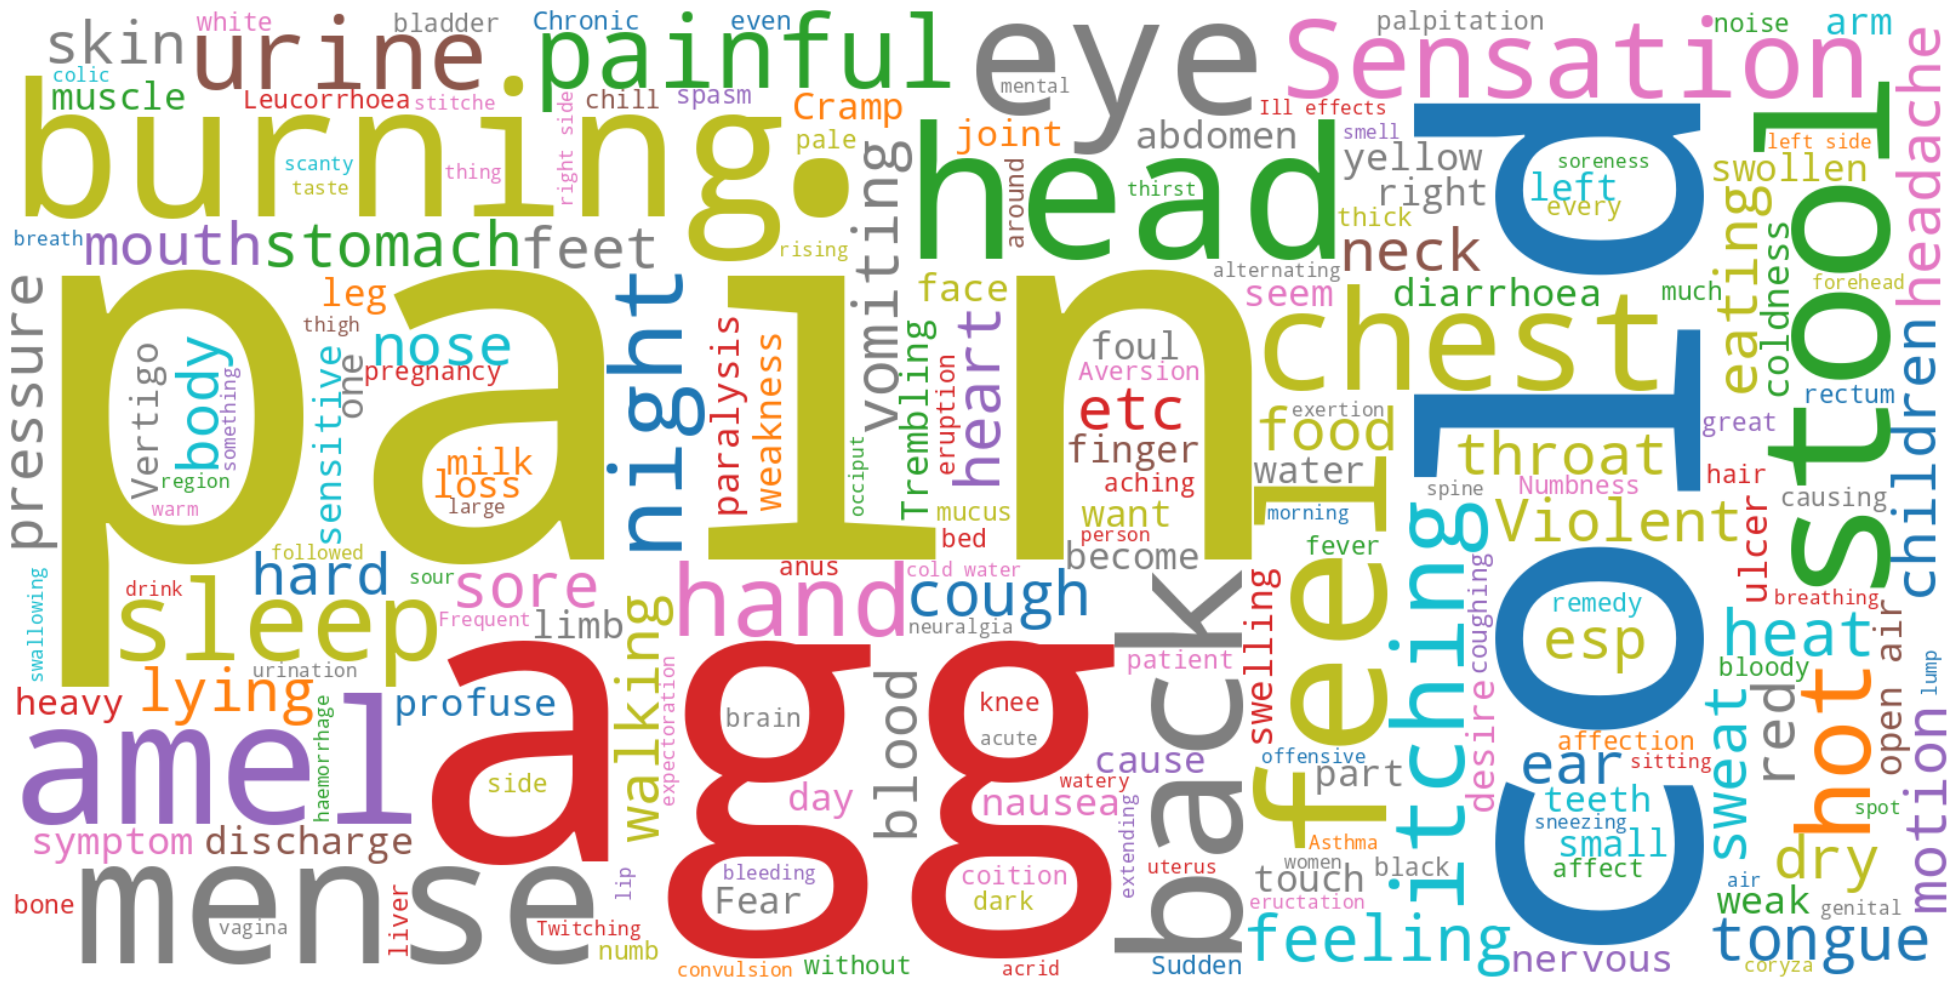

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


json_path = "/content/phatak_final.json"
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)


all_text = ""
for entry in data:
    symptoms = entry.get("symptoms", {})
    for section, lines in symptoms.items():
        all_text += " ".join(lines) + " "


wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    colormap="tab10"
).generate(all_text)


plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
medicine_names = []
symptom_counts = {}
all_sections = set()


for entry in data:
    med_name = entry.get("medicine", "Unknown")
    medicine_names.append(med_name)

    symptoms = entry.get("symptoms", {})
    count = sum(len(v) for v in symptoms.values())
    symptom_counts[med_name] = count

    all_sections.update(symptoms.keys())


print("Total Medicines:", len(medicine_names))
print("Medicine Names:", medicine_names[:10], "...")  # First 10
print("Unique Symptom Categories:", sorted(all_sections))
print("\nSymptom Count per Medicine (sample):")
for med in list(symptom_counts.keys())[:5]:  # Show 5 samples
    print(f"  - {med}: {symptom_counts[med]} symptoms")


Total Medicines: 325
Medicine Names: ['Abies canadensis', 'Aconitum napellus', 'Actaea spicata', 'Adonis vernalis', 'Aesculus hippocastanum', 'Aethusa cynapium', 'Agaricus muscarius', 'Agnus castus', 'Agraphis nutans', 'Ailanthus glandulosa'] ...
Unique Symptom Categories: ['Abdomen', 'Alfalfa', 'Alumen', 'Alumina', 'Anthracinum', 'Antidote', 'Back', 'Badiaga', 'Belladonna', 'Benzinum', 'Better', 'Bromium', 'Carcinosinum', 'Causticum', 'Cedron', 'Chamomilla', 'Chest', 'Chlorum', 'Cholesterinum', 'Cinnabaris', 'Coca', 'Colocynthis', 'Compare', 'Complementary', 'Cundurango', 'Curare', 'Diphtherinum', 'Dose', 'Dulcamara', 'Ear', 'Ears', 'Elaterium', 'Eupionum', 'Extremities', 'Eyes', 'Face', 'Female', 'Females', 'Fever', 'Fevers', 'Follows', 'Gambogia', 'Generalities', 'Glonoinum', 'Graphites', 'Head', 'Hear', 'Heart', 'Heat', 'Iodium', 'Iodoformium', 'Ipecacuanha', 'Jaborandi', 'Jalapa', 'Kreosotum', 'Laurocerasus', 'Lecithinum', 'Lyssinum', 'Malandrinum', 'Male', 'Mancinella', 'Medorrhi

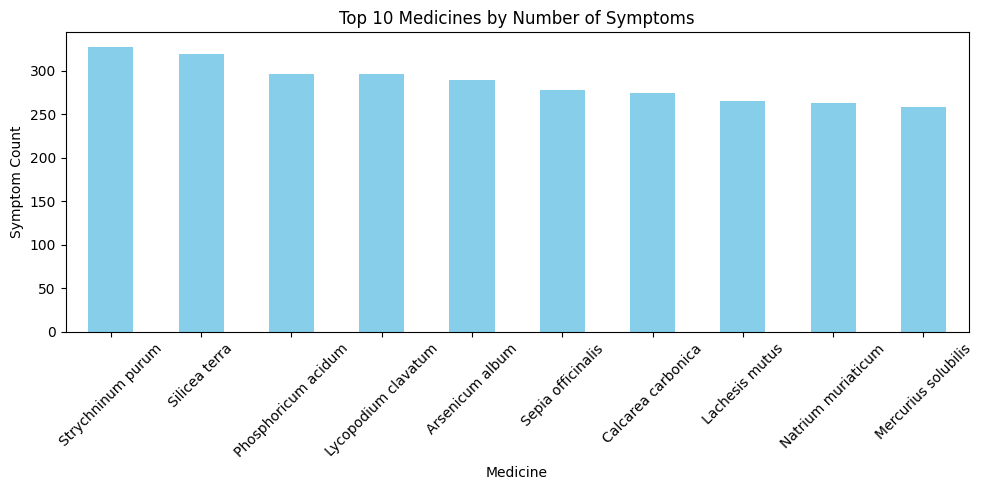

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(flat_data)
symptom_counts = df['medicine'].value_counts().head(10)

symptom_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Top 10 Medicines by Number of Symptoms")
plt.xlabel("Medicine")
plt.ylabel("Symptom Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


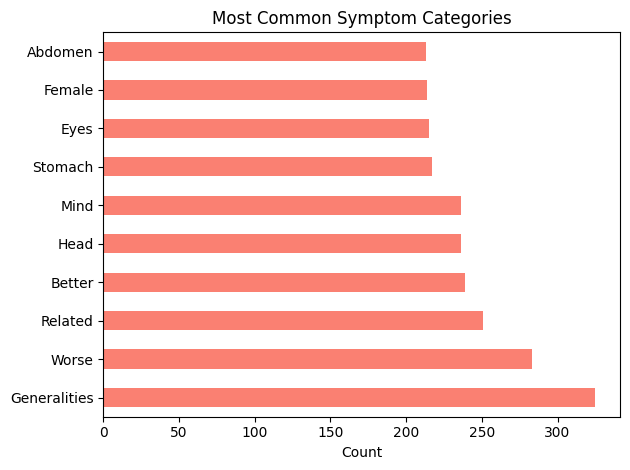

In [ ]:
from collections import Counter

section_counts = Counter()
for entry in data:
    section_counts.update(entry['symptoms'].keys())

pd.Series(section_counts).sort_values(ascending=False).head(10).plot(kind='barh', color='salmon')
plt.title("Most Common Symptom Categories")
plt.xlabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
!pip install -q openai langchain sentence-transformers faiss-cpu

data[0]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.6 MB/s eta 0:00:00


{'medicine': 'Abies canadensis',
 'symptoms': {'Generalities': ['- It affects the Mucous Membranes and Nerves.',
   "- In stomach, it causes a catarrhal condition, which increases the patient's hunger and craving for coarse food, such as",
   'pickles, radishes, turnips etc.',
   '- Patient wants to lie down, all the time, on account of nervous weakness and feels faint.',
   '- In women, it causes uterine displacement, due to defective nutrition and debility.',
   '- Peculiar sensations are - right lung and liver, feel hard and small; uterus feels soft.',
   '- Lies with the legs drawn up.'],
  'Mind': ['- Easily fretful or quiet and careless.'],
  'Head': ['- Feels, as if it is light or there is swimming in the head.'],
  'Stomach': ['- Ravenous appetite.',
   '- Tendency to eat, far beyond the capacity of digestion.',
   '- Distention of abdomen and stomach, with palpitation.',
   ''],
  'Females': ['- Sore feeling at the uterus amel. pressure.',
   '- Uterus soft and feeble as if.']

In [ ]:
def extract_symptom_text(remedy_entry):
    med_name = remedy_entry['medicine']
    all_symptoms = []
    for section, symptoms in remedy_entry.get('symptoms', {}).items():
        for symptom in symptoms:
            if symptom.strip():
                all_symptoms.append(f"{section}: {symptom.strip()}")
    return med_name, all_symptoms

flat_data = []
for remedy in data:
    med, symptoms = extract_symptom_text(remedy)
    for symptom in symptoms:
        flat_data.append({
            "medicine": med,
            "symptom": symptom
        })


flat_data[:3]


[{'medicine': 'Abies canadensis',
  'symptom': 'Generalities: - It affects the Mucous Membranes and Nerves.'},
 {'medicine': 'Abies canadensis',
  'symptom': "Generalities: - In stomach, it causes a catarrhal condition, which increases the patient's hunger and craving for coarse food, such as"},
 {'medicine': 'Abies canadensis',
  'symptom': 'Generalities: pickles, radishes, turnips etc.'}]

In [ ]:
!pip install faiss-cpu


In [ ]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np


model = SentenceTransformer('all-MiniLM-L6-v2')


texts = [entry["symptom"] for entry in flat_data]
embeddings = model.encode(texts, show_progress_bar=True)


index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(np.array(embeddings))


symptom_to_medicine = {i: flat_data[i] for i in range(len(flat_data))}


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/800 [00:00<?, ?it/s]

In [ ]:
np.save("embeddings.npy", embeddings)

In [ ]:
import numpy as np

embeddings = np.load("embeddings.npy")
print(embeddings.shape)


(25596, 384)


In [ ]:
faiss.write_index(index, "faiss_index.idx")

In [ ]:
with open("flat_data.json", "w", encoding="utf-8") as f:
    json.dump(flat_data, f, ensure_ascii=False, indent=2)

print("Saved embeddings.npy, faiss_index.idx, and flat_data.json")

Saved embeddings.npy, faiss_index.idx, and flat_data.json


In [ ]:
for i in range(5):
    print(f"Symptom: {flat_data[i]['symptom']}")
    print(f"Embedding: {embeddings[i][:5]}...")
    print()


Symptom: Generalities: - It affects the Mucous Membranes and Nerves.
Embedding: [ 0.0861306  -0.07975134  0.07810493  0.05629813 -0.03571513]...

Symptom: Generalities: - In stomach, it causes a catarrhal condition, which increases the patient's hunger and craving for coarse food, such as
Embedding: [ 0.08786475 -0.06047568  0.00555537  0.09252118 -0.09085169]...

Symptom: Generalities: pickles, radishes, turnips etc.
Embedding: [ 0.00314948 -0.04512849  0.00092942  0.08752251 -0.03157809]...

Symptom: Generalities: - Patient wants to lie down, all the time, on account of nervous weakness and feels faint.
Embedding: [ 0.02586993  0.03832297 -0.01667846  0.06979675 -0.04330182]...

Symptom: Generalities: - In women, it causes uterine displacement, due to defective nutrition and debility.
Embedding: [-0.00496279 -0.09642082  0.03975716  0.10167453 -0.01589976]...



In [ ]:
def search_symptom(query, k=5):
    query_embedding = model.encode([query])
    D, I = index.search(np.array(query_embedding), k)
    results = []
    for i in I[0]:
        entry = symptom_to_medicine[i]
        results.append(f"{entry['medicine']}: {entry['symptom']}")
    return results



In [ ]:
from transformers import pipeline

model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
generator = pipeline("text-generation", model=model_name)


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
def build_context(query, k=5):
    results = search_symptom(query, k)
    return "\n".join(results)


In [ ]:
def build_prompt(query, context):
    return f"""You are a helpful homeopathy assistant.
Use only the information provided below to answer the question.

Symptoms and remedies:
{context}

Question: {query}

Answer only based on the above symptoms and remedies. Do not add any extra information or speculation.
"""


In [ ]:
def generate_answer(query, k=5):
    context = build_context(query, k)
    prompt = build_prompt(query, context)
    response = generator(prompt, max_new_tokens=150, do_sample=True, temperature=0.7)

    # Clean the output to remove everything before "Answer:"
    raw_text = response[0]['generated_text']
    answer_start = raw_text.find("Answer:")
    if answer_start != -1:
        cleaned_answer = raw_text[answer_start + len("Answer:"):].strip()
    else:
        cleaned_answer = raw_text.strip()

    return cleaned_answer


In [ ]:
user_query = "What remedies are suggested for headaches with nausea?"
answer = generate_answer(user_query)
print(answer)


You are a helpful homeopathy assistant.
Use only the information provided below to answer the question.

Symptoms and remedies:
Indigo tinctoria: Head: - Migraine, with nausea and vomiting.
Arum triphyllum: Head: - Headache agg. warm clothes, and hot coffee.
Gossypium herbaceum: Head: - Headache, with nausea, during menses.
Robinia pseudacacia: Generalities: - Sick headache with acid vomiting.
Borax veneta: Head: - Headache, with nausea and trembling of the whole body.

Question: What remedies are suggested for headaches with nausea?

Answer only based on the above symptoms and remedies. Do not add any extra information or speculation.

Remedy: Arum triphyllum

Remedy: Arum triphyllum is suggested for headaches with nausea due to arsenic poisoning or because of nausea from excessive use of alcohol. Arum is a herb that is helpful in nerve tissue disorders. This remedy is also effective for headaches due to arsenic poisoning, as it helps to relieve the headache and nausea. Arum is also b

In [ ]:
query = "feeling headache, vomitting?"
answer = generate_answer(query)
print("🧠 Answer:\n", answer)

🧠 Answer:
 You are a helpful homeopathy assistant.
Use only the information provided below to answer the question.

Symptoms and remedies:
Lachesis mutus: Stomach: - Vomits during menses, with headache.
Argentum nitricum: Head: - Headache ends in vomiting.
Helleborus niger: Head: - Headache ends in vomiting.
Indigo tinctoria: Head: - Migraine, with nausea and vomiting.
Gossypium herbaceum: Stomach: - Vomiting and purging, and icy cold sweat, with headache.

Question: feeling headache, vomitting?

Answer only based on the above symptoms and remedies. Do not add any extra information or speculation.

Please provide a detailed explanation for each remedy and its potential benefits in treating this symptom.

Remedies:
- Lachesis mutus: Stomach: This remedy is useful for treating a headache caused by vomiting. It works by promoting digestion and removing excess stomach acid. It can also help to reduce nausea and vomiting by reducing acid production.
- Argentum nitricum: Head: This remedy is

# GUI

In [ ]:
!pip install -q gradio sentence-transformers faiss-cpu transformers


In [ ]:
import gradio as gr
import numpy as np
import faiss
import json
from sentence_transformers import SentenceTransformer
from transformers import pipeline

# Load your models and data
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = np.load("embeddings.npy")
index = faiss.read_index("faiss_index.idx")
with open("flat_data.json", "r", encoding="utf-8") as f:
    flat_data = json.load(f)

symptom_to_medicine = {i: flat_data[i] for i in range(len(flat_data))}
generator = pipeline("text-generation", model="TinyLlama/TinyLlama-1.1B-Chat-v1.0")

def search_symptom(query, k=5):
    query_embedding = model.encode([query])
    D, I = index.search(np.array(query_embedding), k)
    results = []
    for i in I[0]:
        entry = symptom_to_medicine[i]
        results.append(f"{entry['medicine']}: {entry['symptom']}")
    return results

def build_context(query, k=5):
    results = search_symptom(query, k)
    return "\n".join(results)

def build_prompt(query, context):
    return f"""Helpful homeopathy assistant.

Symptoms and remedies:
{context}

Question: {query}
Answer only based on the above symptoms and remedies. Do not add any extra information or speculation.

"""


def generate_answer(query, k=5):
    context = build_context(query, k)
    prompt = build_prompt(query, context)
    response = generator(prompt, max_new_tokens=150, do_sample=False)
    raw_text = response[0]['generated_text']
    answer_start = raw_text.find("Answer:")
    if answer_start != -1:
        cleaned_answer = raw_text[answer_start + len("Answer:"):].strip()
    else:
        cleaned_answer = raw_text.strip()


    return cleaned_answer

Device set to use cpu


In [ ]:
def gradio_interface(query):
    return generate_answer(query)

# Setting up the Gradio interface
iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(label="Enter Symptoms", placeholder="e.g., headache, nausea"),
    outputs=gr.Textbox(label="Homeopathic Remedies"),
    title="Homeopathy Recommendation System",
    description="""
<div style="background-color: #f0f8ff; padding: 10px; border-radius: 8px; font-size: 18px; font-weight: bold;">
🩺 Enter your symptoms, and get suggestions for homeopathic remedies 💊🌿
</div>
"""


)

# Launching the app
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8ab9651dbd246b6cad.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


VALIDATION CHECK

In [ ]:
!pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=4bec15b6e5bc456ed067cb158c602e6723b8ece06dca7240ef3575b670731762
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import fuzz
from rouge_score import rouge_scorer
from sentence_transformers import SentenceTransformer
import numpy as np

def validate_remedies(query, top_remedies, full_data, sentence_model):
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

    print(f"\nValidation for query: '{query}'\n")

    for i, remedy_name in enumerate(top_remedies):
        remedy = next((item for item in full_data if item["medicine"] == remedy_name), None)
        if not remedy:
            print(f"{i+1}. {remedy_name} not found in data.\n")
            continue

        all_symptoms = []
        for section, lines in remedy['symptoms'].items():
            all_symptoms.extend(lines)
        remedy_text = " ".join(all_symptoms)

        query_emb = sentence_model.encode([query])[0]
        remedy_emb = sentence_model.encode([remedy_text])[0]
        sentence_sim = np.dot(query_emb, remedy_emb) / (np.linalg.norm(query_emb) * np.linalg.norm(remedy_emb))

        fuzzy_score = fuzz.token_set_ratio(query, remedy_text) / 100

        vectorizer = TfidfVectorizer().fit([query, remedy_text])
        tfidf_matrix = vectorizer.transform([query, remedy_text])
        tfidf_score = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]

        rouge_score = scorer.score(query, remedy_text)['rougeL'].fmeasure

        avg_score = (sentence_sim + fuzzy_score + tfidf_score + rouge_score) / 4

        print(f"{i+1}. {remedy_name}")
        print(f"   - SentenceTransformer: {sentence_sim:.4f}")
        print(f"   - FuzzyWuzzy:          {fuzzy_score:.4f}")
        print(f"   - TF-IDF:              {tfidf_score:.4f}")
        print(f"   - ROUGE-L:             {rouge_score:.4f}")
        print(f"   => Avg Score:          {avg_score:.4f}\n")


In [ ]:
from sentence_transformers import SentenceTransformer

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Sample usage
user_query = "headache with nausea"
top_medicines = ["Gossypium herbaceum", "Borax veneta", "Indigo tinctoria","Phytolacca decandra","Lachesis mutus"]
validate_remedies(user_query, top_medicines, data, model)



Validation for query: 'headache with nausea'

1. Gossypium herbaceum
   - SentenceTransformer: 0.0873
   - FuzzyWuzzy:          1.0000
   - TF-IDF:              0.0827
   - ROUGE-L:             0.0040
   => Avg Score:          0.2935

2. Borax veneta
   - SentenceTransformer: 0.1839
   - FuzzyWuzzy:          1.0000
   - TF-IDF:              0.0983
   - ROUGE-L:             0.0077
   => Avg Score:          0.3225

3. Indigo tinctoria
   - SentenceTransformer: 0.3120
   - FuzzyWuzzy:          0.7100
   - TF-IDF:              0.1848
   - ROUGE-L:             0.0051
   => Avg Score:          0.3030

4. Phytolacca decandra
   - SentenceTransformer: 0.1802
   - FuzzyWuzzy:          1.0000
   - TF-IDF:              0.1087
   - ROUGE-L:             0.0082
   => Avg Score:          0.3243

5. Lachesis mutus
   - SentenceTransformer: 0.2281
   - FuzzyWuzzy:          1.0000
   - TF-IDF:              0.0980
   - ROUGE-L:             0.0036
   => Avg Score:          0.3324

